<a href="https://colab.research.google.com/github/Mario-16180/Reservamos_Challenge/blob/main/notebooks/Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Importing necessary dependencies**

In [1]:
import os
import pandas as pd
import zipfile

# **1. Reading raw data**

### For the following code cell, it is necessary to download the data from the drive https://drive.google.com/drive/folders/1ID1nI1E7wK6UO3urFr7dS1nFXkVxrP1- as compressed files with the names "batch1" and "batch2" (the data is divided into two zip files due to the size of the files). Otherwise, you can also upload the 6 CSV files directly.


---



In [2]:
if os.path.exists('batch1.zip') and os.path.exists('batch2.zip'):
  print('Zip files exist. Extracting the CSV files...')
  # Reading into dataframes the three CSV files from zip batch1
  path = "/content/batch1.zip"
  with zipfile.ZipFile(path, 'r') as zip_ref:
      zip_ref.extractall()
      df_reservamos_purchase_complete = pd.read_csv("reservamos_purchase_complete.csv")
      df_tenant_purchase_complete = pd.read_csv('tenant_purchase_complete.csv')
      df_tenant_search = pd.read_csv('tenant_search.csv')
  # Reading into dataframes the three CSV files from zip batch2
  path2 = "/content/batch2.zip"
  with zipfile.ZipFile(path2, 'r') as zip_ref:
      zip_ref.extractall()
      df_reservamos_purchase_attempt = pd.read_csv("reservamos_purchase_attempt.csv")
      df_reservamos_search = pd.read_csv('reservamos_search.csv')
      df_tenant_purchase_attempt = pd.read_csv('tenant_purchase_attempt.csv')
else:
  df_reservamos_purchase_complete = pd.read_csv("reservamos_purchase_complete.csv")
  df_reservamos_purchase_attempt = pd.read_csv("reservamos_purchase_attempt.csv")
  df_reservamos_search = pd.read_csv('reservamos_search.csv')
  df_tenant_purchase_complete = pd.read_csv('tenant_purchase_complete.csv')
  df_tenant_search = pd.read_csv('tenant_search.csv')
  df_tenant_purchase_attempt = pd.read_csv('tenant_purchase_attempt.csv')


Zip files exist. Extracting the CSV files...


<ipython-input-2-4689f2a88075>:7: DtypeWarning: Columns (41,69,70,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reservamos_purchase_complete = pd.read_csv("reservamos_purchase_complete.csv")
<ipython-input-2-4689f2a88075>:8: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tenant_purchase_complete = pd.read_csv('tenant_purchase_complete.csv')
<ipython-input-2-4689f2a88075>:9: DtypeWarning: Columns (74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tenant_search = pd.read_csv('tenant_search.csv')
<ipython-input-2-4689f2a88075>:14: DtypeWarning: Columns (22,82,90,92,93,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reservamos_purchase_attempt = pd.read_csv("reservamos_purchase_attempt.csv")
<ipython-input-2-4689f2a88075>:15: DtypeWarning: Columns (55,56,57,58) have mixed typ

# **2. Understanding and getting the relevant features**

In [3]:
dfs = {"reservamos_purchase_complete": df_reservamos_purchase_complete,
       "reservamos_purchase_attempt": df_reservamos_purchase_attempt,
       "reservamos_search": df_reservamos_search,
       "tenant_purchase_complete": df_tenant_purchase_complete,
       "tenant_search": df_tenant_search,
       "tenant_purchase_attempt": df_tenant_purchase_attempt}
# Deleting the dataframes to save RAM
del df_reservamos_purchase_complete
del df_reservamos_purchase_attempt
del df_reservamos_search
del df_tenant_purchase_complete
del df_tenant_search
del df_tenant_purchase_attempt

In [4]:
for key, value in dfs.items():
  print(f"Dataframe {key} has {value.shape[0]} observations and {value.shape[1]} features.")

Dataframe reservamos_purchase_complete has 17872 observations and 81 features.
Dataframe reservamos_purchase_attempt has 254848 observations and 98 features.
Dataframe reservamos_search has 1734163 observations and 59 features.
Dataframe tenant_purchase_complete has 477258 observations and 96 features.
Dataframe tenant_search has 1976476 observations and 92 features.
Dataframe tenant_purchase_attempt has 644161 observations and 101 features.


### 2.1 Dealing with empty columns and columns with a single value 🧹

Empty columns will add nothing to the analysis of the data and will only increase the dimensionality of our dataframes.

Moreover, columns with a single value can also be removed for the same logic, and because a variance of 0 in quantitative variables are meaningless.

---



In [5]:
# Removing empty columns
for key, value in dfs.items():
  # Checking how many columns will be removed
  print(f"Dataframe {key} has {value.shape[1]} features.")
  print(f"Removing empty columns...")
  columns = value.isna().sum() == len(value)
  columns = columns[columns == True].index.to_list()
  value = value.drop(columns, axis=1)
  print(columns)
  dfs[key] = value
  print(f"Dataframe {key} now has {value.shape[1]} features.\n")


Dataframe reservamos_purchase_complete has 81 features.
Removing empty columns...
['Payment Card Affiliate']
Dataframe reservamos_purchase_complete now has 80 features.

Dataframe reservamos_purchase_attempt has 98 features.
Removing empty columns...
[]
Dataframe reservamos_purchase_attempt now has 98 features.

Dataframe reservamos_search has 59 features.
Removing empty columns...
['Lodging Provider']
Dataframe reservamos_search now has 58 features.

Dataframe tenant_purchase_complete has 96 features.
Removing empty columns...
['Departure Multicarrier Lines', 'Departure Multicarrier Transporters', 'Departure Stop Cities', 'Discount Code', 'Payment Card Affiliate', 'Return Multicarrier Lines', 'Return Multicarrier Transporters', 'Return Stop Cities']
Dataframe tenant_purchase_complete now has 88 features.

Dataframe tenant_search has 92 features.
Removing empty columns...
['Lodging Provider']
Dataframe tenant_search now has 91 features.

Dataframe tenant_purchase_attempt has 101 featur

In [6]:
# Removing columns with a single value
for key, value in dfs.items():
  print(f"Dataframe {key} has {value.shape[1]} features.")
  print(f"Removing columns with a single value...")
  columns = value.nunique() == 1
  columns = columns[columns == True].index.to_list()
  value = value.drop(columns, axis=1)
  print(columns)
  dfs[key] = value
  print(f"Dataframe {key} now has {value.shape[1]} features.\n")

Dataframe reservamos_purchase_complete has 80 features.
Removing columns with a single value...
['event', '$lib_version', '$mp_api_endpoint', 'Insurance Amount', 'Payment Engine', 'Save Card', 'Test Version', 'Use Saved Card', 'Use Viaja Ahorrando Discount', 'Viaja Ahorrando', 'Wants Taxi', 'mp_lib', '$is_reshuffled']
Dataframe reservamos_purchase_complete now has 67 features.

Dataframe reservamos_purchase_attempt has 98 features.
Removing columns with a single value...
['event', 'Departure Open Ticket', 'Language', 'Payment Engine', 'Viaja Ahorrando', 'Return Open Ticket', '$is_reshuffled', '$android_app_version', '$app_version_string', '$had_persisted_distinct_id']
Dataframe reservamos_purchase_attempt now has 88 features.

Dataframe reservamos_search has 58 features.
Removing columns with a single value...
['event', '$is_reshuffled', '$had_persisted_distinct_id', '$android_app_version', '$app_version_string']
Dataframe reservamos_search now has 53 features.

Dataframe tenant_purcha

In [7]:
# First let's give back the event column for each dataframe
for key, value in dfs.items():
  event = key.split("_")[-1]
  value["event"] = event
  dfs[key] = value

### 2.2 Combining the attempt and complete purchase dataframes for each one of the services, i.e. Reservamos and Tenant.

*purchase complete* ⊂ *purchase attempt* ⊂ *search*

*   From ***complete*** to ***attempt*** via "Token".
*   From ***search*** it might be necessary to group first by user, that is, "User Fingerprint", and then via "Departure Origin"-"Origin", "Departure Time"-"Departure", "Departure Destination"-"Destination", "Passenger Count"-"Passengers", respectively.

#### **Reservamos**



---



In [ ]:
'''
Doing a join on three dataframes.
From reservamos_purchase_complete to reservamos _purchase_attempt is done by right joining via the Token columnm,
while from reservamos_purchase_attempt to reservamos_search is done by right joining via the columns
"Departure Origin"-"Origin", "Departure Time"-"Departure", "Departure Destination"-"Destination", "Passenger Count"-"Passengers".
'''
df_reservamos_purchase = dfs["reservamos_purchase_attempt"].merge(dfs["reservamos_purchase_complete"], on="Token", how="left")
# Remove dfs["reservamos_purchase_attempt"] and dfs["reservamos_purchase_complete"] to save RAM
del dfs["reservamos_purchase_attempt"]
del dfs["reservamos_purchase_complete"]
# Change the name of column "event_x" to "completed"
df_reservamos_purchase.rename(columns={"event_y": "completed"}, inplace=True)
df_reservamos_purchase.rename(columns={"event_x": "attempt"}, inplace=True)
# Change the values "complete" with 1, then fill the null values with 0
df_reservamos_purchase["completed"] = df_reservamos_purchase["completed"].replace("complete", 1)
df_reservamos_purchase["completed"] = df_reservamos_purchase["completed"].fillna(0)
# Combining duplicated columns of df_reservamos_purchase with "combine_first()" to keep all information and avoid redundancy
columns = df_reservamos_purchase.columns.to_list()
duplicated_columns_x = [column for column in df_reservamos_purchase.columns if column.endswith('_x')]
duplicated_columns_y = [column for column in df_reservamos_purchase.columns if column.endswith('_y')]
# Sorting the name of duplicated columns to match them
duplicated_columns_x.sort()
duplicated_columns_y.sort()
# Creating a list with the new names of duplicated columns
new_named_columns = [column[:-2] for column in duplicated_columns_x]
# Create the new combined columns with fixed name, i.e. removing the suffix _x or _y
for i in range(len(new_named_columns)):
  df_reservamos_purchase[new_named_columns[i]] = df_reservamos_purchase[duplicated_columns_y[i]].combine_first(df_reservamos_purchase[duplicated_columns_x[i]])
# Deleting duplicated columns of df_reservamos_purchase
df_reservamos_purchase = df_reservamos_purchase.drop(duplicated_columns_x, axis=1)
df_reservamos_purchase = df_reservamos_purchase.drop(duplicated_columns_y, axis=1)

Doing the first manual feature cleaning of the dataframe *df_reservamos_purchase*. By looking what at the data of each column, I consider the following selected columns as important for extracting insights.


---



In [ ]:
# Columns to keep from df_reservamos_purchase
columns_to_keep = ['$city','$distinct_id_before_identity','$insert_id','$os',
 'Departure Arrival','Departure Destination','Departure Destination Terminal',
 'Departure Line','Departure Origin','Departure Origin Terminal','Departure Price',
 'Departure Route','Departure Stops','Departure Time','Departure Transporter',
 'Passenger Count','Payment Type','Return Arrival','Return Destination',
 'Return Destination Terminal','Return Line','Return Origin','Return Origin Terminal',
 'Return Price','Return Route','Return Stops','Return Time','Return Transporter',
 'Token','Total','User Fingerprint','User Type','completed','distinct_id','fbclid',
 'gclid','time','$user_id', '$region','utm_term']

In [ ]:
df_reservamos_purchase = df_reservamos_purchase[columns_to_keep]

In [ ]:
# First change name of important columns of dfs["reservamos_search"]
new_named_columns = ["Departure Origin","Departure Time", "Departure Destination", "Passenger Count"]
old_named_columns = ['Origin', 'Departure', 'Destination', 'Passengers']
for i in range(len(new_named_columns)):
  dfs["reservamos_search"].rename(columns={old_named_columns[i]: new_named_columns[i]}, inplace=True)
# Renaming other important columns
dfs['reservamos_search'].rename(columns={'Route': 'Departure Route','Return': 'Return Time'}, inplace=True)

In [ ]:
# Columns to keep from dfs["reservamos_search"]
columns_to_keep = ['$city','$distinct_id_before_identity','$insert_id','$region',
 '$user_id','Departure Destination','Departure Origin',
 'Departure Route','Departure Time','Origin Terminal',
 'Passenger Count','Return Time','User Fingerprint','User Type','distinct_id','event',
 'fbclid','gclid','$os','time','utm_term']

In [ ]:
dfs["reservamos_search"] = dfs["reservamos_search"][columns_to_keep]

#### Checkpoint Reservamos

In [ ]:
# Save df_reservamos_purchase, and dfs["reservamos_search"]
df_reservamos_purchase.to_csv('df_reservamos_purchase.csv', index=False)
dfs["reservamos_search"].to_csv('dfs_reservamos_search.csv', index=False)

In [ ]:
df_reservamos_purchase = df_reservamos_purchase.groupby(['distinct_id', "User Fingerprint", "Departure Origin", "Departure Destination",
                                "Departure Time", "Passenger Count"]).agg({"completed": ["count", "sum"],
                                                                           "$os":pd.Series.mode,"utm_term":pd.Series.mode})
df_reservamos_search = dfs['reservamos_search'].groupby(['distinct_id', "User Fingerprint", "Departure Time", "Departure Origin",
                                "Departure Destination", "Passenger Count"]).agg({"event": "count"})
del dfs["reservamos_search"]

# **3. Analysis of Reservamos Data**

## 3.1 Analyzing the distribution of the success rate of purchasing

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get the success rate of purchasing by dividing the sum column of completed by the count column of completed
df_reservamos_purchase["success_rate"] = df_reservamos_purchase["completed"]["sum"] / df_reservamos_purchase["completed"]["count"]

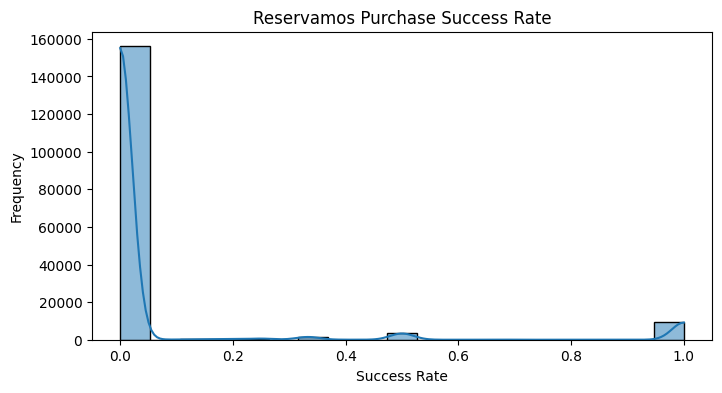

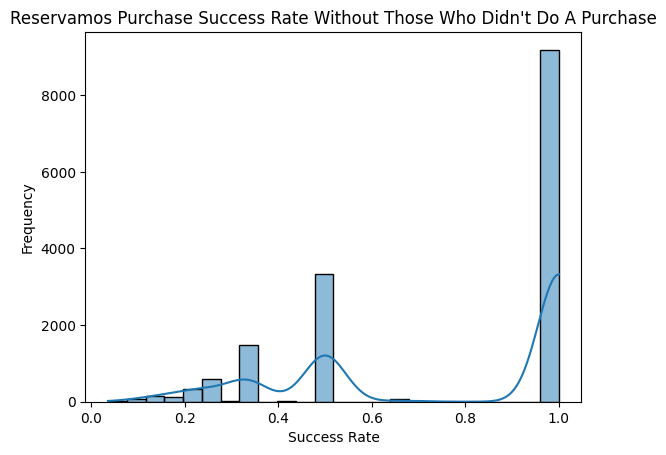

In [ ]:
# Doing the calculations
reservamos_purchase_success_rate = df_reservamos_purchase["success_rate"].to_numpy()
# Plotting the distribution with title and name on the axes
reservamos_purchase_success_rate = np.array(reservamos_purchase_success_rate)
# # Plotting the distribution with title and name on the axes
plt.figure(figsize=(8, 4))
sns.histplot(reservamos_purchase_success_rate, kde=True)
plt.title("Reservamos Purchase Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("Frequency")
plt.show()
# Plotting the distribution without 0's with title and name on the axes
sns.histplot(reservamos_purchase_success_rate[reservamos_purchase_success_rate != 0], kde=True)
plt.title("Reservamos Purchase Success Rate Without Those Who Didn't Do A Purchase")
plt.xlabel("Success Rate")
plt.ylabel("Frequency")
plt.show()

## 3.2 Analyzing the total amount of sales per OS

In [ ]:
# Getting a sub-dataframe for Reservemos and Tenant of the OS and success rate
df_reservamos_os_success = df_reservamos_purchase["$os"]["mode"].to_frame().join(df_reservamos_purchase["success_rate"]).reset_index(drop=True)
df_reservamos_os_success["mode"] = df_reservamos_os_success['mode'].astype(str)
df_reservamos_os_success.rename(columns={"mode":"OS"}, inplace=True)

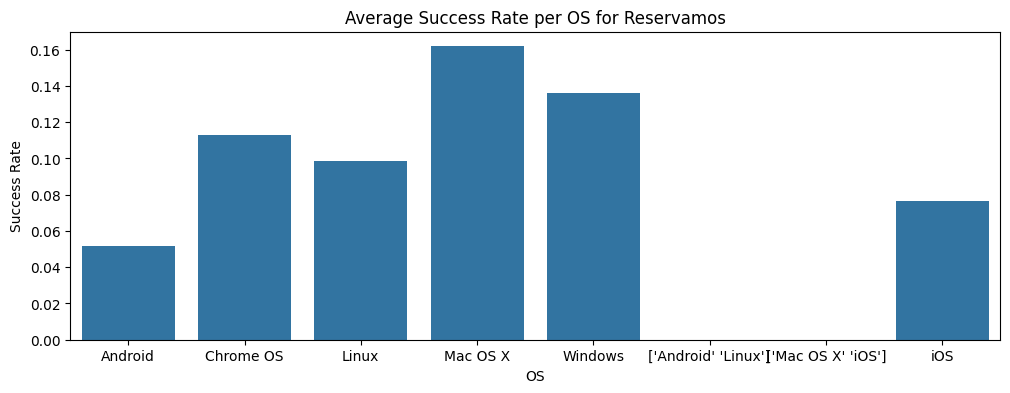

                    OS  success_rate
0              Android      0.051825
1            Chrome OS      0.113139
2                Linux      0.098348
3             Mac OS X      0.161781
4              Windows      0.136181
5  ['Android' 'Linux']      0.000000
6   ['Mac OS X' 'iOS']      0.000000
7                  iOS      0.076747


In [ ]:
# Plotting the average per OS in Reservamos, first by grouping by "mode" and then aggregating with average
df_reservamos_os_success_average = df_reservamos_os_success.groupby("OS").mean().reset_index()
plt.figure(figsize=(12, 4))
sns.barplot(x="OS", y="success_rate", data=df_reservamos_os_success_average)
plt.title("Average Success Rate per OS for Reservamos")
plt.xlabel("OS")
plt.ylabel("Success Rate")
plt.show()
print(df_reservamos_os_success_average)

## 3.3 Analyzing the effectiveness of marketing campaign

In [ ]:
# Getting a sub-dataframe for Reservemos of the utm_term and success_rate
df_reservamos_utm_success = df_reservamos_purchase["utm_term"]["mode"].to_frame().join(df_reservamos_purchase["success_rate"]).reset_index(drop=True)
df_reservamos_utm_success["mode"] = df_reservamos_utm_success['mode'].astype(str)
df_reservamos_utm_success.rename(columns={"mode":"utm_term"}, inplace=True)
top10_utm_terms = df_reservamos_utm_success["utm_term"].value_counts()[1:11].index.to_list()

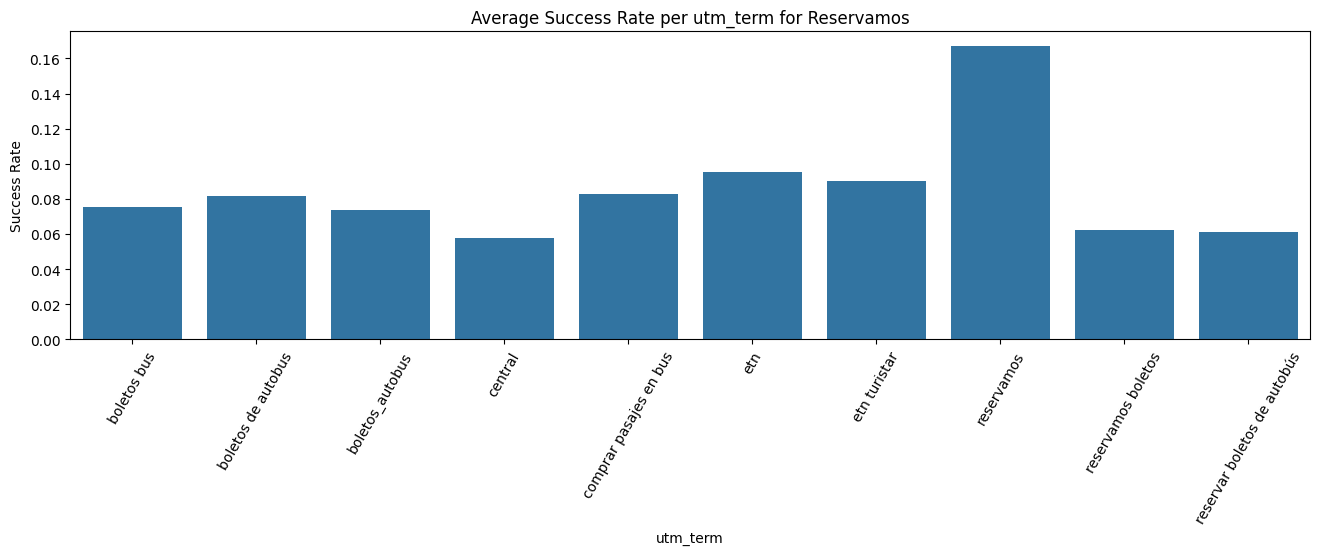

                      utm_term  success_rate
0                  boletos bus      0.075197
1           boletos de autobus      0.081640
2              boletos_autobus      0.073863
3                      central      0.057698
4       comprar pasajes en bus      0.082852
5                          etn      0.095173
6                 etn turistar      0.089935
7                   reservamos      0.167008
8           reservamos boletos      0.062022
9  reservar boletos de autobús      0.061029


In [ ]:
# Plotting the average per utm_term in Reservamos, first by grouping by "mode" and then aggregating with average of success rate
df_reservamos_utm_success_average = df_reservamos_utm_success[df_reservamos_utm_success["utm_term"].isin(top10_utm_terms)].groupby("utm_term").mean().reset_index()
plt.figure(figsize=(16, 4))
sns.barplot(x="utm_term", y="success_rate", data=df_reservamos_utm_success_average)
plt.title("Average Success Rate per utm_term for Reservamos")
plt.xlabel("utm_term")
plt.xticks(rotation=60)
plt.ylabel("Success Rate")
plt.show()
print(df_reservamos_utm_success_average)

# **3. Analysis of Tenant Data**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
'''
del df_reservamos_search
del df_reservamos_purchase
del df_reservamos_os_success
del df_reservamos_os_success_average
del df_reservamos_utm_success
del df_reservamos_utm_success_average
'''
del dfs["reservamos_search"]
del dfs["reservamos_purchase_attempt"]
del dfs["reservamos_purchase_complete"]
del dfs["tenant_search"]

#### **Tenant**

In [10]:
# Reducing dimensionality first to save RAM
'''columns_to_keep = ['$city','$distinct_id_before_identity','$insert_id',
 'Departure Arrival','Departure Destination','Departure Destination Terminal',
 'Departure Line','Departure Origin','Departure Origin Terminal','Departure Price',
 'Departure Route','Departure Stops','Departure Time',
 'Passenger Count','Return Arrival','Return Destination',
 'Return Destination Terminal','Return Line','Return Origin','Return Origin Terminal',
 'Return Price','Return Route','Return Stops','Return Time',
 'Token','Total','User Fingerprint','User Type','time','$user_id', '$region']
dfs["tenant_purchase_complete"] = dfs["tenant_purchase_complete"][columns_to_keep]
dfs["tenant_purchase_attempt"] = dfs["tenant_purchase_attempt"][columns_to_keep]'''
dfs["tenant_purchase_complete"].dropna(subset=["Departure Origin", "Departure Time", "Departure Destination", "Passenger Count"], inplace=True)
dfs["tenant_purchase_attempt"].dropna(subset=["Departure Origin", "Departure Time", "Departure Destination", "Passenger Count"], inplace=True)

In [11]:
'''
Doing a join on three dataframes.
From tenant_purchase_complete to tenant_purchase_attempt is done by right joining via the Token columnm,
while from tenant_purchase_attempt to tenant_search is done by right joining via the columns
"Departure Origin"-"Origin", "Departure Time"-"Departure", "Departure Destination"-"Destination", "Passenger Count"-"Passengers".
'''
df_tenant_purchase = dfs["tenant_purchase_attempt"].merge(dfs["tenant_purchase_complete"], on="Token", how="left")
# Remove dfs["tenant_purchase_attempt"] and dfs["tenant_purchase_complete"] to save RAM
del dfs["tenant_purchase_attempt"]
del dfs["tenant_purchase_complete"]
df_tenant_search = pd.read_csv('tenant_search.csv')
# Change the name of column "event_x" to "completed"
df_tenant_purchase.rename(columns={"event_y": "completed"}, inplace=True)
df_tenant_purchase.rename(columns={"event_x": "attempt"}, inplace=True)
# Change the values "complete" with 1, then fill the null values with 0
df_tenant_purchase["completed"] = df_tenant_purchase["completed"].replace("complete", 1)
df_tenant_purchase["completed"] = df_tenant_purchase["completed"].fillna(0)
# Combining duplicated columns of df_tenant_purchase with "combine_first()" to keep all information and avoid redundancy
columns = df_tenant_purchase.columns.to_list()
duplicated_columns_x = [column for column in df_tenant_purchase.columns if column.endswith('_x')]
duplicated_columns_y = [column for column in df_tenant_purchase.columns if column.endswith('_y')]
# Sorting the name of duplicated columns to match them
duplicated_columns_x.sort()
duplicated_columns_y.sort()
# Creating a list with the new names of duplicated columns
new_named_columns = [column[:-2] for column in duplicated_columns_x]
# Create the new combined columns with fixed name, i.e. removing the suffix _x or _y
for i in range(len(new_named_columns)):
  df_tenant_purchase[new_named_columns[i]] = df_tenant_purchase[duplicated_columns_y[i]].combine_first(df_tenant_purchase[duplicated_columns_x[i]])
# Deleting duplicated columns of df_tenant_purchase
df_tenant_purchase = df_tenant_purchase.drop(duplicated_columns_x, axis=1)
df_tenant_purchase = df_tenant_purchase.drop(duplicated_columns_y, axis=1)

<ipython-input-11-1437ce3cce57>:11: DtypeWarning: Columns (74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tenant_search = pd.read_csv('tenant_search.csv')


Doing the first manual feature cleaning of the dataframe *df_tenant_purchase*. By looking what at the data of each column, I consider the following selected columns as important for extracting insights.


---


In [14]:
# Columns to keep from df_reservamos_purchase
columns_to_keep = ['$city','$distinct_id_before_identity','$insert_id','$os',
 'Departure Arrival','Departure Destination','Departure Destination Terminal',
 'Departure Line','Departure Origin','Departure Origin Terminal','Departure Price',
 'Departure Route','Departure Stops','Departure Time',
 'Passenger Count','Payment Type','Return Arrival','Return Destination',
 'Return Destination Terminal','Return Line','Return Origin','Return Origin Terminal',
 'Return Price','Return Route','Return Stops','Return Time',
 'Token','Total','User Fingerprint','User Type','completed','distinct_id','time','$user_id', '$region','utm_term']

In [15]:
df_tenant_purchase = df_tenant_purchase[columns_to_keep]

In [17]:
# First change name of important columns of dfs["reservamos_search"]
new_named_columns = ["Departure Origin","Departure Time", "Departure Destination", "Passenger Count"]
old_named_columns = ['Origin', 'Departure', 'Destination', 'Passengers']
for i in range(len(new_named_columns)):
  df_tenant_search.rename(columns={old_named_columns[i]: new_named_columns[i]}, inplace=True)
# Renaming other important columns
df_tenant_search.rename(columns={'Route': 'Departure Route','Return': 'Return Time'}, inplace=True)

In [18]:
# Columns to keep from dfs["reservamos_search"]
columns_to_keep = ['$city','$distinct_id_before_identity','$insert_id','$region',
 '$user_id','Departure Destination','Departure Origin',
 'Departure Route','Departure Time','Origin Terminal',
 'Passenger Count','Return Time','User Fingerprint','User Type','distinct_id','event',
 'fbclid','$os','time','utm_term']

In [19]:
df_tenant_search= df_tenant_search[columns_to_keep]

In [20]:
# Save df_tenant_purchase, and dfs["tenant_search"]
df_tenant_purchase.to_csv('df_tenant_purchase.csv', index=False)
df_tenant_search.to_csv('dfs_tenant_search.csv', index=False)

In [21]:
df_tenant_purchase = df_tenant_purchase.groupby(['distinct_id', "User Fingerprint", "Departure Origin", "Departure Destination",
                                "Departure Time", "Passenger Count"]).agg({"completed": ["count", "sum"],
                                                                           "$os":pd.Series.mode,"utm_term":pd.Series.mode})
df_tenant_search = df_tenant_search.groupby(['distinct_id', "User Fingerprint", "Departure Time", "Departure Origin",
                                "Departure Destination", "Passenger Count"]).agg({"event": "count"})

Analysis of the Tenant data. It is put after Reservamos due to lack of RAM


---



In [22]:
df_tenant_purchase["success_rate"] = df_tenant_purchase["completed"]["sum"] / df_tenant_purchase["completed"]["count"]

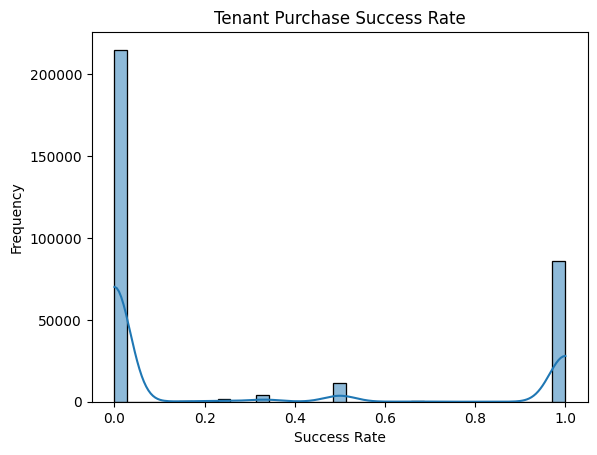

Text(0, 0.5, 'Frequency')

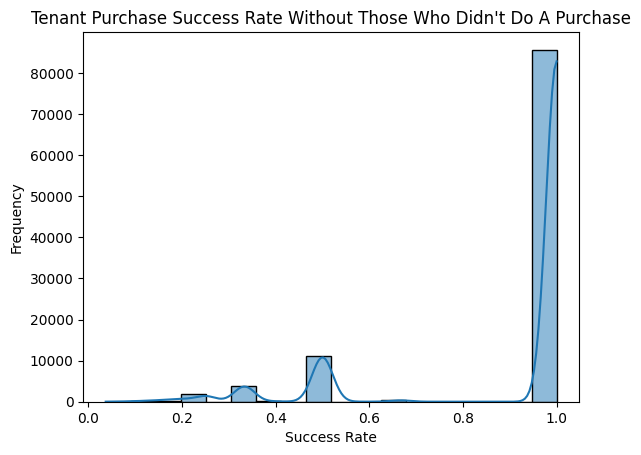

In [23]:
# Doing the calculations
tenant_purchase_success_rate = df_tenant_purchase["success_rate"].to_numpy()
# Plotting the distribution with title and name on the axes
sns.histplot(tenant_purchase_success_rate, kde=True)
plt.title("Tenant Purchase Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("Frequency")
plt.show()
# Plotting the distribution without 0's with title and name on the axes
sns.histplot(tenant_purchase_success_rate[tenant_purchase_success_rate != 0], kde=True)
plt.title("Tenant Purchase Success Rate Without Those Who Didn't Do A Purchase")
plt.xlabel("Success Rate")
plt.ylabel("Frequency")

## 3.2 Analyzing the total amount of sales per OS

In [24]:
# Getting a sub-dataframe for Reservemos and Tenant of the OS and success rate
df_tenant_os_success = df_tenant_purchase["$os"]["mode"].to_frame().join(df_tenant_purchase["success_rate"]).reset_index(drop=True)
df_tenant_os_success["mode"] = df_tenant_os_success['mode'].astype(str)
df_tenant_os_success.rename(columns={"mode":"OS"}, inplace=True)

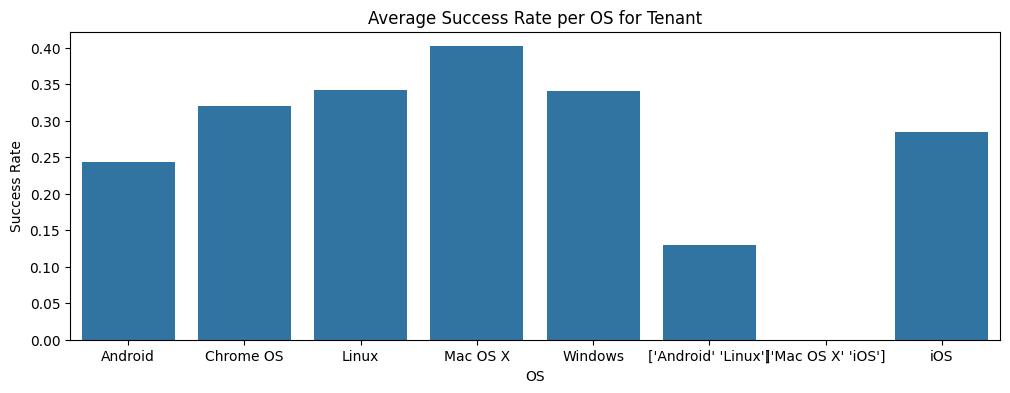

                    OS  success_rate
0              Android      0.243244
1            Chrome OS      0.320034
2                Linux      0.341407
3             Mac OS X      0.401745
4              Windows      0.340709
5  ['Android' 'Linux']      0.130000
6   ['Mac OS X' 'iOS']      0.000000
7                  iOS      0.284527


In [25]:
# Plotting the average per OS in Tenant, first by grouping by "mode" and then aggregating with average
df_tenant_os_success_average = df_tenant_os_success.groupby("OS").mean().reset_index()
# Plotting the average per OS in Tenant, first by grouping by "mode" and then aggregating with average
plt.figure(figsize=(12, 4))
sns.barplot(x="OS", y="success_rate", data=df_tenant_os_success_average)
plt.title("Average Success Rate per OS for Tenant")
plt.xlabel("OS")
plt.ylabel("Success Rate")
plt.show()
print(df_tenant_os_success_average)

## 3.3 Analyzing the effectiveness of marketing campaign

In [26]:
# Getting a sub-dataframe for Reservemos of the utm_term and success_rate
df_tenant_utm_success = df_tenant_purchase["utm_term"]["mode"].to_frame().join(df_tenant_purchase["success_rate"]).reset_index(drop=True)
df_tenant_utm_success["mode"] = df_tenant_utm_success['mode'].astype(str)
df_tenant_utm_success.rename(columns={"mode":"utm_term"}, inplace=True)
top10_utm_terms = df_tenant_utm_success["utm_term"].value_counts()[1:11].index.to_list()

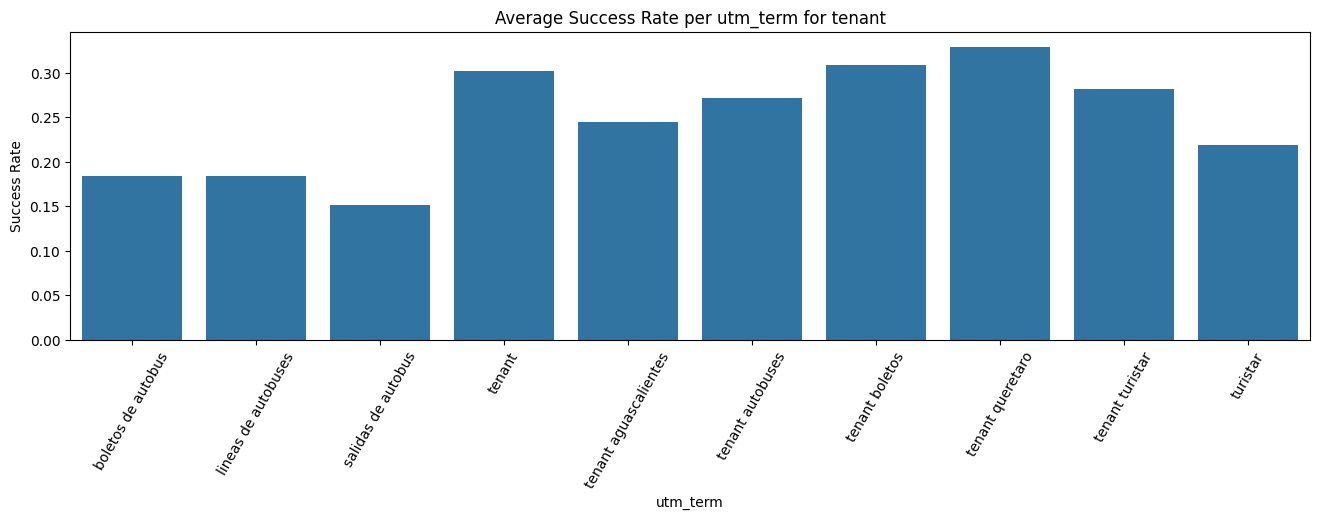

In [27]:
# Plotting the average per utm_term in tenant, first by grouping by "mode" and then aggregating with average of success rate
df_tenant_utm_success_average = df_tenant_utm_success[df_tenant_utm_success["utm_term"].isin(top10_utm_terms)].groupby("utm_term").mean().reset_index()
plt.figure(figsize=(16, 4))
sns.barplot(x="utm_term", y="success_rate", data=df_tenant_utm_success_average)
plt.title("Average Success Rate per utm_term for tenant")
plt.xlabel("utm_term")
plt.xticks(rotation=60)
plt.ylabel("Success Rate")
plt.show()
print(df_tenant_utm_success_average)

In [28]:
print(df_tenant_utm_success_average)

                utm_term  success_rate
0     boletos de autobus      0.184666
1    lineas de autobuses      0.184556
2     salidas de autobus      0.151209
3                 tenant      0.301834
4  tenant aguascalientes      0.245022
5       tenant autobuses      0.271292
6         tenant boletos      0.308976
7       tenant queretaro      0.329290
8        tenant turistar      0.281569
9               turistar      0.219076
